In [13]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


Epoch 1/21
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2678 - accuracy: 0.9221
Epoch 2/21
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1077 - accuracy: 0.9674
Epoch 3/21
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0755 - accuracy: 0.9761
Epoch 4/21
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0554 - accuracy: 0.9824
Epoch 5/21
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0412 - accuracy: 0.9866
Epoch 6/21
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0348 - accuracy: 0.9883
Epoch 7/21
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0246 - accuracy: 0.9916
Epoch 8/21
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0214 - accuracy: 0.9929
Epoch 9/21
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0194 - accuracy: 0.9932
Epoch 10/21
1875/1875 [==============================] - 3s 2ms/step - loss: 0.013

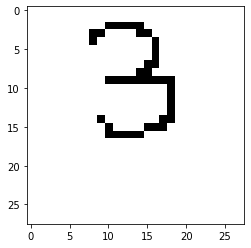

----------------
The predicted value is :  4
----------------


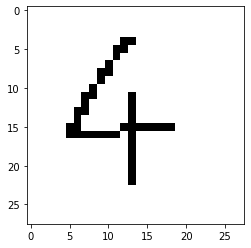

----------------
The predicted value is :  7
----------------


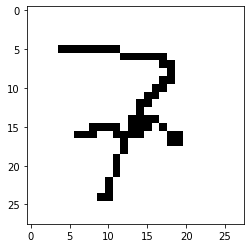

----------------
The predicted value is :  8
----------------


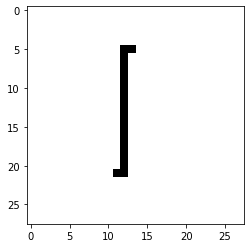

In [15]:
import pandas as pd
import tensorflow as tf
import numpy as np
import cv2 as cv  
import matplotlib.pyplot as plt
from tensorflow.python.keras.metrics import accuracy
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test,y_test)=mnist.load_data()# split the data in training set as tuple

x_train = tf.keras.utils.normalize(x_train , axis = 1)
x_test = tf.keras.utils.normalize(x_test , axis = 1)

model= tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(units=128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=10,activation=tf.nn.softmax))
model.compile(optimizer='adam' , loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train, epochs=21)#As the number of epochs increases beyond 11,chance of overfitting of the model on training data

loss , accuracy  =model.evaluate(x_test,y_test)
print(accuracy)
print(loss)



for x in range(1,5):
    # now we are going to read images it with open cv

    img=cv.imread(f'{x}.png')[:,:,0]#all of it and 1st and last one
    img=np.invert(np.array([img]))#invert black to white in images so that model wont get confues
    prediction=model.predict(img)
    print("----------------")
    print("The predicted value is : ",np.argmax(prediction))
    print("----------------")
    plt.imshow(img[0],cmap=plt.cm.binary)#change the color in black and white
    plt.show()